# Week 4 / Day 5 / Pandas Practice

2018-09-17

**Dataset:** Cell phone network account churns

In [2]:
import pandas as pd

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [18]:
df = pd.read_csv('data/cell_phone_churn.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state             3333 non-null object
account_length    3333 non-null int64
area_code         3333 non-null int64
intl_plan         3333 non-null object
vmail_plan        3333 non-null object
vmail_message     3333 non-null int64
day_mins          3333 non-null float64
day_calls         3333 non-null int64
day_charge        3333 non-null float64
eve_mins          3333 non-null float64
eve_calls         3333 non-null int64
eve_charge        3333 non-null float64
night_mins        3333 non-null float64
night_calls       3333 non-null int64
night_charge      3333 non-null float64
intl_mins         3333 non-null float64
intl_calls        3333 non-null int64
intl_charge       3333 non-null float64
custserv_calls    3333 non-null int64
churn             3333 non-null bool
dtypes: bool(1), float64(8), int64(8), object(3)
memory usage: 498.1+ KB


In [6]:
df.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
# States with highest turnover
df.groupby('state')['churn'].count().nlargest(5)

state
WV    106
MN     84
NY     83
AL     80
OH     78
Name: churn, dtype: int64

### Turnovers

In [30]:
# States with lowest account length
df.groupby('state')['account_length'].mean().nsmallest(5)

state
KY    91.830508
MA    91.861538
MT    92.676471
TN    92.716981
IA    94.318182
Name: account_length, dtype: float64

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


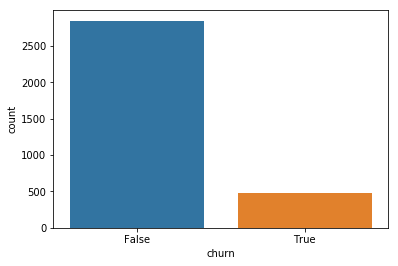

In [27]:
sns.countplot(df.churn)

In [28]:
# How many people were churned?
df.churn.sum()

483

In [29]:
df.shape

(3333, 20)

In [32]:
# Of people who churned, who had an international account?
df.groupby(['intl_plan', 'churn'])['churn'].count()

intl_plan  churn
no         False    2664
           True      346
yes        False     186
           True      137
Name: churn, dtype: int64

### Customer Service

In [34]:
# States with highest customer service calls
df.groupby('state')['custserv_calls'].count().nlargest(5)

state
WV    106
MN     84
NY     83
AL     80
OH     78
Name: custserv_calls, dtype: int64

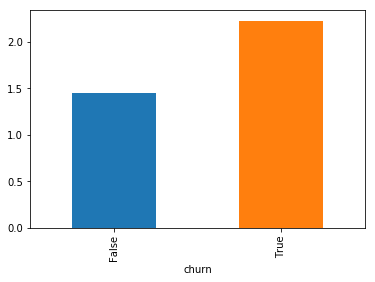

In [37]:
# Of people who were churned, what was the average customer service call?
df.groupby('churn')['custserv_calls'].mean().plot(kind = 'bar')

### Aggregate Columns

In [46]:
# Creates new column called 'call_sum'
df['call_sum'] = df.day_calls + df.eve_calls + df.night_calls + df.intl_calls

In [47]:
# Scroll to end of chart to see new column
df.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,...,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn,call_sum
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,303
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,332
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,333
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,255
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,359


In [39]:
df['call_sum'].describe()

count    3333.000000
mean      305.137114
std        34.448164
min       191.000000
25%       282.000000
50%       305.000000
75%       328.000000
max       416.000000
Name: call_sum, dtype: float64

In [43]:
df.groupby('state')['call_sum'].count().nlargest()

state
WV    106
MN     84
NY     83
AL     80
OH     78
Name: call_sum, dtype: int64

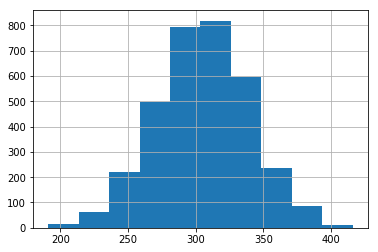

In [40]:
df.call_sum.hist()

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


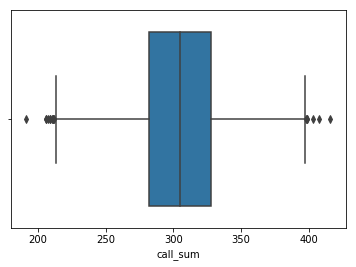

In [41]:
sns.boxplot(df.call_sum)